In [ ]:
!pip install notebook wordcloud pillow tqdm

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import requests
import numpy as np


In [2]:
url = "http://www.mldb.org"
artista = "artist-1498-queen.html"
#artista = "artist-6053-milton-nascimento.html"

In [3]:
req = requests.get(f'{url}/{artista}',headers = {'User-Agent': 'Mozilla/5.0'})

In [ ]:
pagina = req.text
pagina

In [5]:
sopao = BeautifulSoup(pagina, 'html.parser')

In [ ]:
sopao

In [7]:
links_musicas = sopao.find_all('a',{'href': re.compile(r'song-*')})

In [ ]:
links_musicas

In [9]:
from tqdm import tqdm

letras_queen = ''

with open('/content/queen.txt','w') as arquivo_letras:
    for link_musica in tqdm(links_musicas):
        url_musica = link_musica['href']
        url_completa = f'{url}/{url_musica}'
        req = requests.get(url_completa,headers = {'User-Agent': 'Mozilla/5.0'})
        sopao_musica = BeautifulSoup(req.text, 'html.parser')
        letra = sopao_musica.find('p',{'class': 'songtext'})
        arquivo_letras.write(f'{letra.text}\n')
        letras_queen += f'{letra.text}\n'

100%|██████████| 332/332 [00:22<00:00, 14.45it/s]


In [ ]:
letras_queen

In [12]:
tokens = letras_queen.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower().strip()

In [ ]:
tokens

In [ ]:
tokens[:20]

In [15]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
palavras_queen = " ".join(tokens)

In [ ]:
palavras_queen

In [18]:
stopwords_customizada = STOPWORDS.union({'go','got','oh','ooh','yeah','hey','thing','things','will','one','que','de','da','mas','quem','se','e','o','é'})

In [19]:
wordcloud = WordCloud(background_color='black',stopwords=stopwords_customizada, random_state=32).generate(palavras_queen)

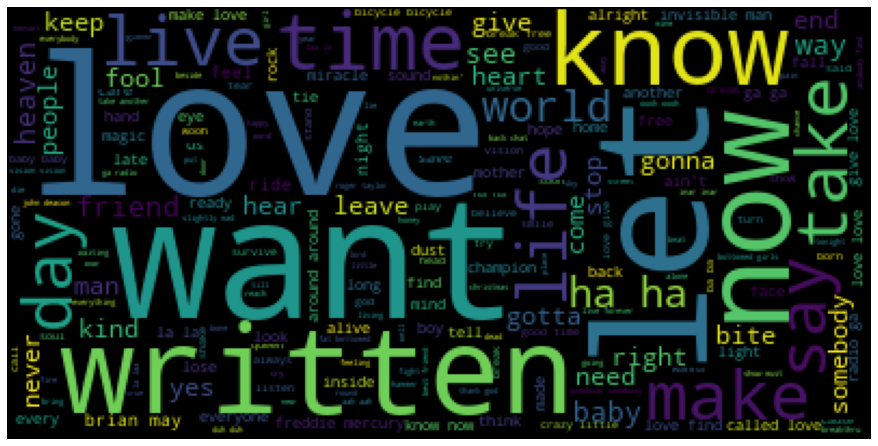

In [20]:
plt.figure(figsize = (12,12), facecolor = None)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.imshow(wordcloud)

In [21]:
wordcloud.to_file('banda.jpg')